Image manipulation demonstration created by Alex Frye, for use in Dr. Hoover's EE/CENG 441/541 Computer Vision class

In [1]:
import skimage
from skimage import io
from skimage import data
from skimage.transform import resize
from skimage.transform import rotate
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
import time
from scipy import signal
from scipy import linalg
from scipy.ndimage import gaussian_filter
import cv2

from Final_Project_lib import *

In [2]:
header = 'Bookshelf_Images/'
im_num_group = 4
im_per_group = 4
im_foot = '.jpg'

im_bookshelf = []
im_bookshelf_gray = []
for i in range(im_num_group):
    im_bookshelf.append([])
    im_bookshelf_gray.append([])
    for j in range(im_per_group):
        temp = io.imread(header + str(i) + '_' + str(j) + im_foot)
        im_bookshelf[i].append(temp)
        temp = io.imread(header + str(i) + '_' + str(j) + im_foot, as_gray = True)
        im_bookshelf_gray[i].append(temp)
        
im_offsets = np.zeros((im_num_group, im_num_group-1, 2))
im_offsets[3,0] = [2065 - 725, 981 - 1100]
im_offsets[3,1] = [2959 - 1937, 1119 - 1041]

img1 = cv2.imread('cvc01passadis/Hallway1/cyl_image04.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cvc01passadis/Hallway1/cyl_image05.png',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('cvc01passadis/Hallway1/cyl_image06.png',cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('cvc01passadis/Hallway1/cyl_image07.png',cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('cvc01passadis/Hallway1/cyl_image08.png',cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('cvc01passadis/Hallway1/cyl_image09.png',cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('cvc01passadis/Hallway1/cyl_image10.png',cv2.IMREAD_GRAYSCALE)
images_hallway = [img1, img2, img3, img4, img5, img6, img7]

img1 = np.array(resize(cv2.imread('Bookshelf_Images/4_3.jpg',cv2.IMREAD_GRAYSCALE), (1080, 720))*255, dtype=np.uint8)
img2 = np.array(resize(cv2.imread('Bookshelf_Images/4_2.jpg',cv2.IMREAD_GRAYSCALE), (1080, 720))*255, dtype=np.uint8)
img3 = np.array(resize(cv2.imread('Bookshelf_Images/4_1.jpg',cv2.IMREAD_GRAYSCALE), (1080, 720))*255, dtype=np.uint8)
img4 = np.array(resize(cv2.imread('Bookshelf_Images/4_0.jpg',cv2.IMREAD_GRAYSCALE), (1080, 720))*255, dtype=np.uint8)
images_bookshelf = [img1, img2, img3, img4]

IMPORTANT NOTE: This code uses the patented SIFT algorithm, so to compile and run this code you must have built opencv from source with the nonfree algorithms enabled

This code stitches images together using a variety of methods on a variety of images in an attempt to gauge each methos's effectiveness and resistance to transformations of the input images. For each method, image A is the panoramic, and image B is the image to add on. Image B is transformed and then each pixel of image B is overwritten with the nonzero pixels of image A. The final image is stored as image A, and the process repeats. 

Method 1: Translational Average Transformation
    - Step 1: Find keypoint matches between each image (Done here with SIFT).
    - Step 2: Compute the average match offset in pixels between each image
        (ex: A feature is found in image A at (100, 100) but the matching feature is found
        in image B at (200, 100). This would result in a distance of (100, 0).
    - Step 3: Put the images together by placing image A at (0, 0) then placing image B offset by the average distance computed in step 2.
    
Methos 2: Affine Transformation
    - Step 1: Find keypoint matches between each image (Done here with SIFT).
    - Step 2: Use least squares to compute the affine transformation (six variables) for each match.
    - Step 3: Put the images together by placing the affine-transformed image B on the final image, and then overwriting all non-zero pixels in the image with the pixels in image A.
    
Methos 3: Homography Transformation
    - Step 1: Find keypoint matches between each image (Done here with SIFT).
    - Step 2: Use the openCV findHomography function (with RANSAC enabled) to compute homography matrix.
    - Step 3: Put the images together by placing the homography-transformed image B on the final image, and then overwriting all non-zero pixels in the image with the pixels in image A.
    
These methods are each run against two datasets:
Dataset 1: Hallway Set
    - This is a subset of the library created by A. Ramirez et al collected from: https://www.iiia.csic.es/~aramisa/datasets/iiiapanos.html
    - This set is just about the easiest image stitching set imaginable. The images are highly overlapping, have no perspective distortion, and are all taken at the same orientation.
    
Dataset 2: Bookshelf Dataset
    - This is a set o 6 images taken of a shelf with hundreds of DVDs stored. There are a few additional elements (such as clocks and dividers to support the shelves), but otherwise it is filled woth all-but-indistinguishable DVD cases. This poses a serious challenge to feature-based feature matching algorithms.

Testing method 1:

Method 1 (Translational Average Transformation) is computationally simple, and does work well in very simplified cases, as can be seen in the test below.

Got 212 matches
Got 72 good matches
mean: [-138.38481786515976, -0.06178924772474493] STD: [5.31468942 1.21076666]
Got 277 matches
Got 50 good matches
mean: [-273.04257469177253, -0.6152333450317382] STD: [10.49272432  0.84519366]
Got 406 matches
Got 45 good matches
mean: [-401.2124638663398, -0.03774837917751735] STD: [60.49102097  0.82579701]
Got 505 matches
Got 52 good matches
mean: [-520.2546512897196, -1.0477940119229827] STD: [81.27839926 10.49358359]
Got 518 matches
Got 33 good matches
mean: [-673.484600529526, -0.05890574599757336] STD: [27.38040794  0.69025868]
Got 528 matches
Got 9 good matches
mean: [-670.5522388882107, -2.5627870559692387] STD: [116.17820031   6.34755899]


(1, 1, 482)

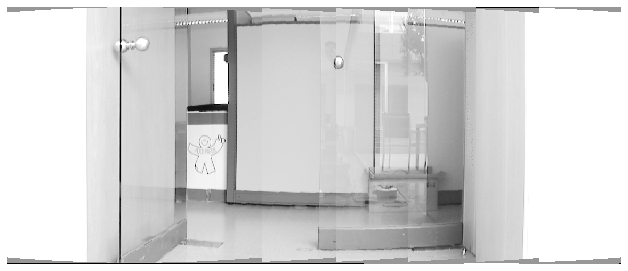

In [3]:
im = panoramic(images_hallway)
ajacent_images([im])

However, on images with non-zero camera rotation, this method is a far cry from perfect, as can be seen in the next test. The image breaks are clearly visible. 

Got 6380 matches
Got 175 good matches
mean: [-288.4786973517283, 39.98886343819757] STD: [5.15609876 9.86020332]
Got 9966 matches
Got 328 good matches
mean: [-569.3162006096139, -10.653990687393557] STD: [8.19374773 8.6548701 ]
Got 12606 matches
Got 284 good matches
mean: [-871.9468166996054, -1.630994313199757] STD: [9.90767452 9.92513469]


(1, 1, 1119)

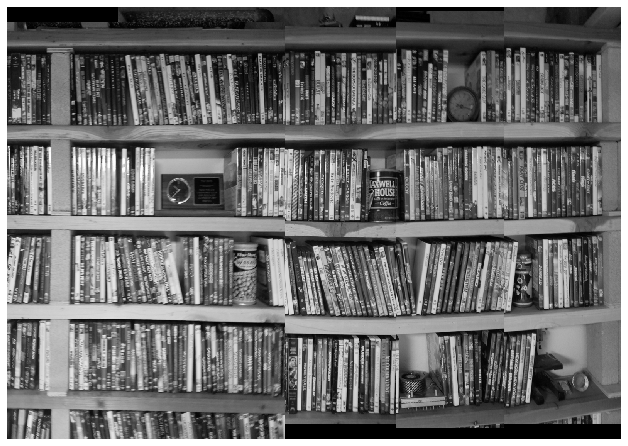

In [4]:
im = panoramic(images_bookshelf)
ajacent_images([im])

Testing method 2:

Method 2 (Affine transformation) is a slight improvement over method 1, yet can produce very strange output. The next test, on the hallway data, startf off just fine, but a single bad estimate takes down the whole image, skewing all subsequent images far away from the true value. This issue unsurprisingly seems to be worst when there are only a few matches.

Got 212 matches
Got 72 good matches
mean: [-138.38481786515976, -0.06178924772474493] STD: [5.31468942 1.21076666]
Got 308 matches
Got 48 good matches
mean: [-271.51032265027374, -1.2898399829864502] STD: [14.26605112  1.81872736]
Got 416 matches
Got 39 good matches
mean: [-391.01960421831177, 4.129786271315355] STD: [27.73323634 52.86594475]
Got 480 matches
Got 25 good matches
mean: [-513.2962370300293, -13.731347885131836] STD: [15.64866904 17.74034533]
Got 511 matches
Got 11 good matches
mean: [-645.2234808314929, -10.334659229625355] STD: [9.63375613 9.266037  ]
Got 539 matches
Got 2 good matches
Too few keypoints, try a higher threshold


(1, 1, 1500)

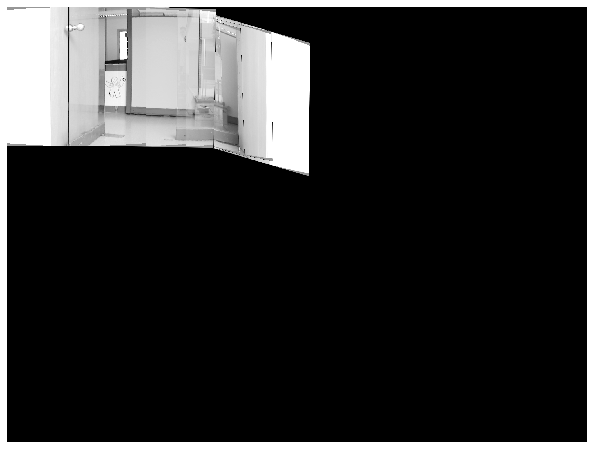

In [5]:
im = panoramic(images_hallway, method='affine', threshold=0.5)
ajacent_images([im])

On an image with vastly more keypoints, this method functions far better. It's still not perfect, and the final 2 breaks are quite visible, but the first break could almost be missed. 

Got 6380 matches
Got 175 good matches
mean: [-288.4786973517283, 39.98886343819757] STD: [5.15609876 9.86020332]
Got 9643 matches
Got 319 good matches
mean: [-554.5107687633241, 38.885858096299174] STD: [10.63255609 19.35119237]
Got 11940 matches
Got 251 good matches
mean: [-842.3280430523998, 41.58964079594708] STD: [20.85278574 26.54635099]


(1, 1, 1500)

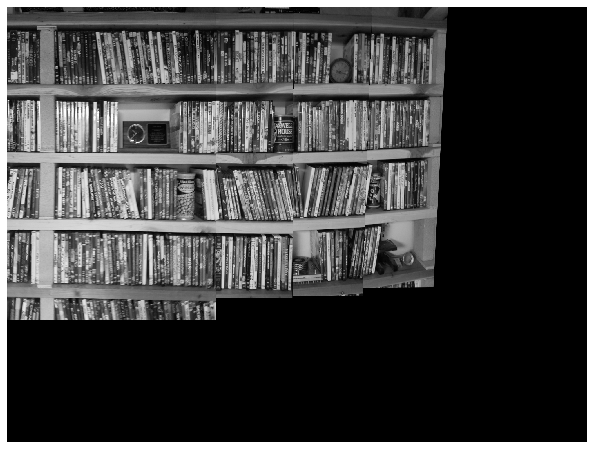

In [6]:
im = panoramic(images_bookshelf, method='affine', threshold=0.5)
ajacent_images([im])

Method 3:

Method 3 (Homography Transform) is very similar to method 2, just that it can also represent perspective inconsistencies, such as when the camer is not perpendicular to the object being photographed. It still does have some issues with slowly slipping out of control, but to a significantly lesser extent than method 2.

Got 212 matches
Got 72 good matches
mean: [-138.38481786515976, -0.06178924772474493] STD: [5.31468942 1.21076666]
Got 293 matches
Got 46 good matches
mean: [-271.5268635127855, -1.4148846087248428] STD: [11.16793968  2.26929675]
Got 395 matches
Got 42 good matches
mean: [-404.71179026649105, 5.90344914935884] STD: [39.00100994 49.29890329]
Got 491 matches
Got 41 good matches
mean: [-516.0620892687542, -3.218528956901736] STD: [62.60750263  7.74877066]
Got 502 matches
Got 15 good matches
mean: [-663.9593935012819, -1.5572982788085938] STD: [4.06064241 5.74493847]
Got 515 matches
Got 2 good matches
Too few keypoints, try a higher threshold


(1, 1, 1500)

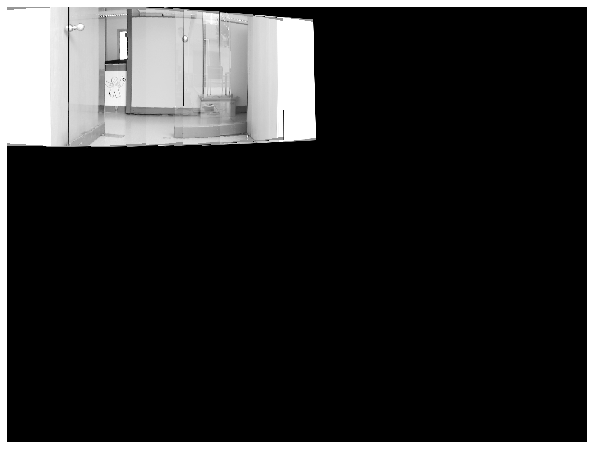

In [7]:
im = panoramic(images_hallway, method='homography', threshold=0.5)
ajacent_images([im])

Method 3 is by far the best in the bookshelf testing, almost perfectly connecting the 4 images together.

Got 6380 matches
Got 175 good matches
mean: [-288.4786973517283, 39.98886343819757] STD: [5.15609876 9.86020332]
Got 9707 matches
Got 327 good matches
mean: [-557.409458036452, 39.41771233701556] STD: [13.08245147 16.56453516]
Got 12397 matches
Got 214 good matches
mean: [-866.9969484917475, 41.35718062213648] STD: [21.58967595 11.5198997 ]


(1, 1, 1500)

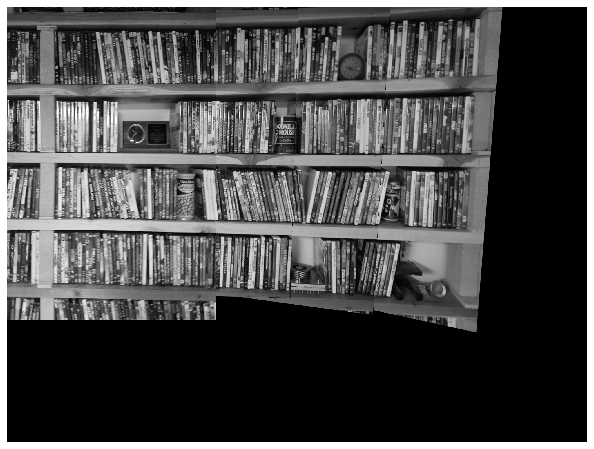

In [8]:
im = panoramic(images_bookshelf, method='homography')
ajacent_images([im])

If nothing else, this shows the power of feature-based image stitching. The bookshelf set is brutally difficult to find good matches, since especially with black and white images, there's almost zero difference between one movie and the next viewing them from the spine. That said, SIFT is in a class of its own in this regard. 

Other feature detectors such as ORB (Oriented FAST and Rotated BRIEF), just fail miserably. The next two tests are the hallway and bookshelf sets, and ORB does perfectly fine on the hallway. The bookshelf on the other hand is a disaster. Even with the threshold removed (a threshold of 0.5 has no good matches), the standard deviation is many times the average; it's just guessing randomly and not finding anything useful.

Got 437 matches
Got 38 good matches
mean: [-137.9753737198679, 0.25222196077045644] STD: [1.01785605 0.93650689]
Got 492 matches
Got 17 good matches
mean: [-275.80433520148785, -0.5484672995174632] STD: [1.70208829 0.93927153]
Got 500 matches
Got 3 good matches
Too few keypoints, try a higher threshold


(1, 1, 480)

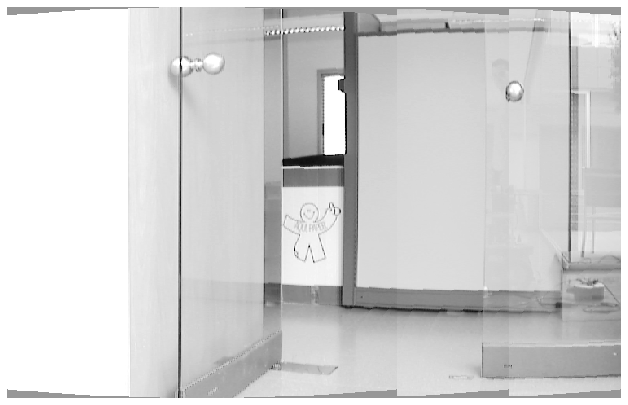

In [9]:
im = panoramic(images_hallway, detector='orb')
ajacent_images([im])

Got 500 matches
Got 500 good matches
mean: [43.797311241149885, 183.43974835205086] STD: [235.68607476 284.36723777]
Got 500 matches
Got 500 good matches
mean: [-2.991930366516114, 44.09702954101566] STD: [265.70261757 333.01979061]
Got 500 matches
Got 500 good matches
mean: [-55.58364901733401, -3.4290826416015636] STD: [242.96568362 335.99171079]


(1, 1, 1307)

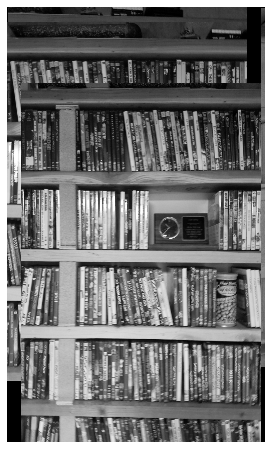

In [10]:
im = panoramic(images_bookshelf, detector='orb', threshold=1)
ajacent_images([im])